In [1]:
import pandas as pd
import numpy as np
import pickle
from joblib import dump, load
import matplotlib.pyplot as plt

In [2]:
def read_data_small():
    X_train = pd.read_csv("data_small/X_train_small.csv")
    X_test = pd.read_csv("data_small/X_test_small.csv")
    y_train = np.asarray(pd.read_csv("data_small/y_train_small.csv", header=None)[0])
    return X_train, X_test, y_train

In [3]:
def read_data_big():
    X_train = pd.read_csv("data_big/X_train_big.csv")
    X_test = pd.read_csv("data_big/X_test_big.csv")
    y_train = np.asarray(pd.read_csv("data_big/y_train_big.csv", header=None)[0])
    return X_train, X_test, y_train

In [4]:
def read_data():
    X_train = pd.read_csv("data/X_train.csv")
    X_test = pd.read_csv("data/X_test.csv")
    y_train = np.asarray(pd.read_csv("data/y_train.csv", header=None)[0])
    return X_train, X_test, y_train

# Visualization

In [5]:
X_train, X_test, y_train = read_data_small()
X_train['y_label'] = y_train
X_train["timeSinceLastTradeSameOrder"] = X_train[["timestamp","orderId"]].groupby("orderId").diff()
X_train.loc[(X_train['timeSinceLastTradeSameOrder']<=45) & (X_train['source']!='SYSTEM'),'y_label']= 3

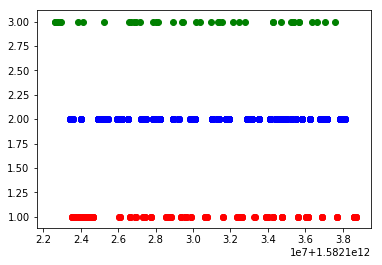

In [15]:
plot1 = X_train[['timestamp','y_label']]
plot1 = plot1[plot1.y_label!=0]
plot1a = plot1[plot1.y_label==1]
plot1b = plot1[plot1.y_label==2]
plot1c = plot1[plot1.y_label==3]

plt.scatter(plot1a['timestamp'],plot1a['y_label'],color='red')
plt.scatter(plot1b['timestamp'],plot1b['y_label'],color='blue')
plt.scatter(plot1c['timestamp'],plot1c['y_label'],color='green')
plt.show()

In [16]:
X_clean = format_data(pd.concat([X_train, X_test]))
X_train_clean = X_clean.iloc[:X_train.shape[0],:]
X_test_clean = X_clean.iloc[X_train.shape[0]:,:]
X_train_clean_scaled = scale(X_train_clean)
X_test_clean_scaled = scale(X_test_clean)

# fit classifier
clf = LogisticRegression(random_state=0, class_weight='balanced').fit(X_train_clean_scaled, y_train)
y_train_prob_pred = clf.predict_proba(X_train_clean_scaled)
y_test_prob_pred = clf.predict_proba(X_test_clean_scaled)

/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: Data with input dtype bool, uint8, int64, float64, object were all converted to float64 by the scale function.
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: Data with input dtype bool, uint8, int64, float64, object were all converted to float64 by the scale function.
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may nee

In [17]:
X_train['y_pred_0'] = y_train_prob_pred[:,0]
X_train['y_pred_1'] = y_train_prob_pred[:,1]
X_train['y_pred_2'] = y_train_prob_pred[:,2]

Example for user 'KYPPWBZJQ'

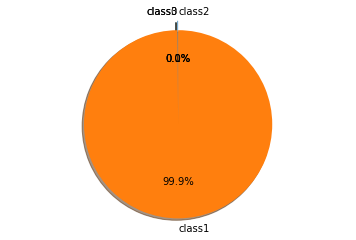

In [18]:
ex1 = X_train[X_train['endUserRef']=='KYPPWBZJQ'].iloc[3]
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'class0','class1','class2','class3'
ex = ex1
sizes = [ex.y_pred_0,ex.y_pred_1,ex.y_pred_2,1-ex.y_pred_0-ex.y_pred_1-ex.y_pred_2]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

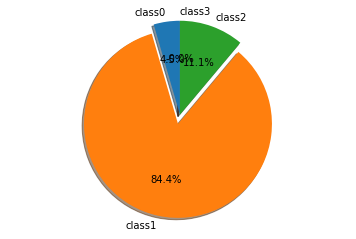

In [19]:
ex2 = X_train[X_train['endUserRef']=='KYPPWBZJQ'].iloc[4]
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'class0','class1','class2','class3'
ex = ex2
sizes = [ex.y_pred_0,ex.y_pred_1,ex.y_pred_2,1-ex.y_pred_0-ex.y_pred_1-ex.y_pred_2]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

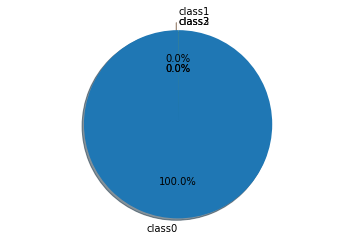

In [20]:
ex3 = X_train[X_train['endUserRef']=='KYPPWBZJQ'].iloc[5]
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'class0','class1','class2','class3'
ex = ex3
sizes = [ex.y_pred_0,ex.y_pred_1,ex.y_pred_2,1-ex.y_pred_0-ex.y_pred_1-ex.y_pred_2]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

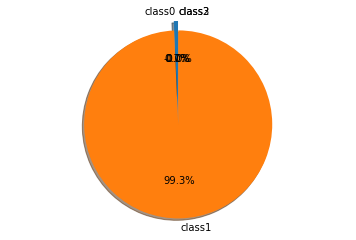

In [21]:
ex4 = X_train[X_train['endUserRef']=='KYPPWBZJQ'].iloc[6]
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'class0','class1','class2','class3'
ex = ex4
sizes = [ex.y_pred_0,ex.y_pred_1,ex.y_pred_2,1-ex.y_pred_0-ex.y_pred_1-ex.y_pred_2]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Example for user 'AIWZOZZIY'

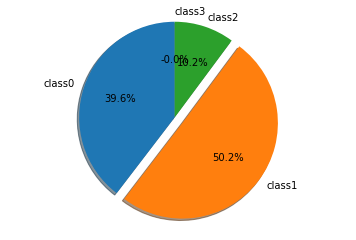

In [22]:
ex1 = X_train[X_train['endUserRef']=='AIWZOZZIY'].iloc[5]
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'class0','class1','class2','class3'
ex = ex1
sizes = [ex.y_pred_0,ex.y_pred_1,ex.y_pred_2,1-ex.y_pred_0-ex.y_pred_1-ex.y_pred_2]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

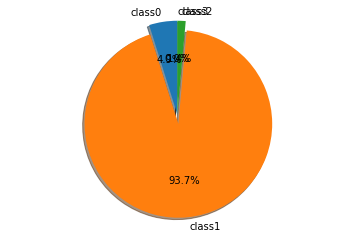

In [23]:
ex2 = X_train[X_train['endUserRef']=='AIWZOZZIY'].iloc[6]
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'class0','class1','class2','class3'
ex = ex2
sizes = [ex.y_pred_0,ex.y_pred_1,ex.y_pred_2,1-ex.y_pred_0-ex.y_pred_1-ex.y_pred_2]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [24]:
cancel_ratio = X_train[['endUserRef','operation','price']].groupby(['endUserRef','operation']).count()
cancel_ratio = cancel_ratio/cancel_ratio.groupby(['endUserRef']).sum()
cancel_ratio = cancel_ratio.reset_index()
cancel_ratio = cancel_ratio[cancel_ratio.operation == 'CANCEL'].rename(columns={'price':'cancel_ratio'}).reset_index().drop(['index','operation'], axis=1)
cancel_ratio = cancel_ratio.sort_values(by='cancel_ratio',ascending=False)
cancel_ratio

,endUserRef,cancel_ratio
426,XMUCLTPRE,0.500000
209,LORNYJXOQ,0.500000
215,LTFCBQMNY,0.500000
172,JRXVRUZHN,0.500000
50,CVNUXBZKR,0.500000
312,QSCFKVKEC,0.500000
47,CTIXWOXEW,0.500000
117,GFVLNPXDD,0.500000
466,ZQPWPEHVW,0.500000
398,VSPEANCCY,0.400000


In [ ]:
np.arange(0,1,0.2)

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(cancel_ratio[8:18]['endUserRef'],cancel_ratio[8:18]['cancel_ratio']*100)
ax.set_xlabel('Cancel Percentage')
ax.set_title('User vs. Cancel Ratio')
plt.show()

In [ ]:
y_train = X_train['y_label']
X_train = X_train.drop(['y_label'],axis=1)
X_train["timeSinceLastTrade"] = X_train[["timestamp","endUserRef"]].groupby("endUserRef").diff()
X_test["timeSinceLastTrade"] = X_test[["timestamp","endUserRef"]].groupby("endUserRef").diff()

In [ ]:
X_train, X_test, y_train = read_data()
X_train['y_label'] = y_train

In [ ]:
X_train["timeSinceLastTradeSameOrder"] = X_train[["timestamp","orderId"]].groupby("orderId").diff()
X_train.loc[(X_train['timeSinceLastTradeSameOrder']<=45) & (X_train['source']!='SYSTEM'),'y_label']= 3
y_train = X_train['y_label']
X_train = X_train.drop(['y_label'],axis=1)
X_train["timeSinceLastTrade"] = X_train[["timestamp","endUserRef"]].groupby("endUserRef").diff()
X_test["timeSinceLastTrade"] = X_test[["timestamp","endUserRef"]].groupby("endUserRef").diff()

In [ ]:
pd.DataFrame(X_train).to_csv("bigLabeledData.csv")

In [5]:
def preprocess_label(X_train, y_train):
    X_train['y_label'] = y_train
    X_train["timeSinceLastTradeSameOrder"] = X_train[["timestamp","orderId"]].groupby("orderId").diff()
    X_train.loc[(X_train['timeSinceLastTradeSameOrder']<=45) & (X_train['source']!='SYSTEM'),'y_label']= 3
    y_train = X_train['y_label']
    X_train = X_train.drop(['y_label'],axis=1)
    X_train["timeSinceLastTrade"] = X_train[["timestamp","endUserRef"]].groupby("endUserRef").diff()
    X_test["timeSinceLastTrade"] = X_test[["timestamp","endUserRef"]].groupby("endUserRef").diff()
#     X_train = X_train.sample(n=200000)
    return X_train,y_train

In [23]:
def balance_data(X_train, X_test, y_train):
    X_train, y_train = preprocess_label(X_train, y_train)
    X_train['y_label'] = y_train
    X_train_0 = X_train[X_train['y_label']==0].sample(n=100000, replace = True)
    X_train_1 = X_train[X_train['y_label']==1].sample(n=100000, replace = True)
    X_train_2 = X_train[X_train['y_label']==2].sample(n=100000, replace = True)
    X_train_3 = X_train[X_train['y_label']==3].sample(n=100000, replace = True)
    X_train = pd.concat([X_train_0, X_train_1, X_train_2, X_train_3])
    X_train = X_train.sample(frac=1).reset_index(drop=True)
    y_train = X_train['y_label']
    X_train = X_train.drop(['y_label'],axis=1)
    return X_train, X_test, y_train

In [28]:
X_train, X_test, y_train = read_data_small()
X_train, X_test, y_train = balance_data(X_train, X_test, y_train)

In [13]:
def format_data(df):
    # encode the binaries
    df["isBid"] = df.isBid*1
    df["isBuyer"] = df.isBuyer*1
    df["isAggressor"] = df.isAggressor*1
    df["type"] = (df.type == "ORDER")*1
    df["source"] = (df.source=="USER")*1

    df["orderId"] = df.orderId.str.split('-').str[-1]
    df["tradeId"] = df.tradeId.str.split('-').str[-1]
    df["bidOrderId"] = df.bidOrderId.str.split('-').str[-1]
    df["askOrderId"] = df.askOrderId.str.split('-').str[-1]

    # encode the multiple lable data
    df['operation'] = df['operation'].fillna('SUCCESS')
    tmp_operation = pd.DataFrame(pd.get_dummies(df.operation), columns=df.operation.unique()[:-1])
    df = pd.concat([df, tmp_operation], axis=1)
    df['op_before'] = df.groupby(['endUserRef'])['operation'].transform(lambda x:x.shift(1))
    tmp_op_before = pd.DataFrame(pd.get_dummies(df.op_before), columns=df.op_before.unique()[:-1])
    df = pd.concat([df, tmp_op_before], axis=1)
    df['multiple_cancel'] = ((df['op_before'] == 'CANCEL') & (df['operation'] == 'CANCEL'))*1.0    

    df['vol_before'] = df.groupby(['endUserRef'])['volume'].transform(lambda x:x.shift(1))
    df['price_before'] = df.groupby(['endUserRef'])['price'].transform(lambda x:x.shift(1))
    df['bestBid'] = df['bestBid'].fillna(1)
    df['midpoint'] = (df.bestBidVolume - df.bestAskVolume)/df.bestBid

#     cancel_ratio = df[['endUserRef','operation','price']].groupby(['endUserRef','operation']).count()
#     cancel_ratio = cancel_ratio/cancel_ratio.groupby(['endUserRef']).sum()
#     cancel_ratio = cancel_ratio.reset_index()
#     cancel_ratio = cancel_ratio[cancel_ratio.operation == 'CANCEL'].rename(columns={'price':'cancel_ratio'}).reset_index().drop(['index','operation'], axis=1)
#     df = df.merge(cancel_ratio, how='outer', on='endUserRef')

    df['isBidBefore'] = df.groupby(['endUserRef'])['isBid'].transform(lambda x:x.shift(1))
    df.loc[df['isBid']!=df['isBidBefore'],'flip'] = 1
    df.loc[df['isBid']==df['isBidBefore'],'flip'] = 0
    df = df.drop(['isBidBefore'],axis=1)

#     categorical data
    tmp_endUserRef = pd.DataFrame(pd.get_dummies(df.endUserRef), columns=df.endUserRef.unique()[:-1])
    df = pd.concat([df, tmp_endUserRef], axis=1)
    tmp_ob = pd.DataFrame(pd.get_dummies(df.obId), columns=df.obId.unique()[:-1])
    df = pd.concat([df, tmp_ob], axis=1)

    # # smartly engineered features can be very useful to improve the classification resutls
#     df["timeSinceLastTrade"] = df[["timestamp","endUserRef"]].groupby("endUserRef").diff()
    df["averageTradeSize"] = df[["volume","endUserRef"]].groupby("endUserRef").mean()
    
    # cancel, volume>0, after successful trade
    df['cancelAfterSuccessfulTrade'] = (df['operation'] == 'CANCEL') & (df['volume']>0) & (df['op_before'] == 'SUCCESS')*1.0
    df['isVolumeTooBig'] = (df['volume'] > 3*df['vol_before'])*1.0
    
    df["numberEditsOnOrders"] = df[["timestamp", "orderId"]].groupby("orderId").count()
    df = df.fillna(-1)
    df = df.drop(['operation', 'op_before', 'obId', 'member','user','endUserRef'], axis=1)

    return(df)

# MODEL

In [14]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [36]:
def detect_spoofying_log_reg(X_train, X_test, y_train):
    
    # clean up the data
#     X_train, y_train = preprocess_label(X_train, y_train)
    X_clean = format_data(pd.concat([X_train, X_test]))
    X_train_clean = X_clean.iloc[:X_train.shape[0],:]
    X_test_clean = X_clean.iloc[X_train.shape[0]:,:]
    X_train_clean_scaled = scale(X_train_clean)
    X_test_clean_scaled = scale(X_test_clean)

    # fit classifier
    clf = LogisticRegression(random_state=0, class_weight='balanced').fit(X_train_clean_scaled, y_train)
    
    dump(clf, 'logreg_model.joblib') 
    
    y_train_prob_pred = clf.predict_proba(X_train_clean_scaled)
    y_test_prob_pred = clf.predict_proba(X_test_clean_scaled)
    
    return y_train_prob_pred, y_test_prob_pred

def detect_spoofying_Bernoulli_NB(X_train, X_test, y_train):
    
    # clean up the data
#     X_train, y_train = preprocess_label(X_train, y_train)
    X_clean = format_data(pd.concat([X_train, X_test]))
    X_train_clean = X_clean.iloc[:X_train.shape[0],:]
    X_test_clean = X_clean.iloc[X_train.shape[0]:,:]
    X_train_clean_scaled = scale(X_train_clean)
    X_test_clean_scaled = scale(X_test_clean)

    # fit classifier
    clf = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None).fit(X_train_clean_scaled, y_train)
    y_train_prob_pred = clf.predict_proba(X_train_clean_scaled)
    y_test_prob_pred = clf.predict_proba(X_test_clean_scaled)
    
    dump(clf, 'bernoulli_nb_model.joblib')
    
    return y_train_prob_pred, y_test_prob_pred

def detect_spoofying_GBC(X_train, X_test, y_train):
    
    # clean up the data
#     X_train, y_train = preprocess_label(X_train, y_train)
    X_clean = format_data(pd.concat([X_train, X_test]))
    X_train_clean = X_clean.iloc[:X_train.shape[0],:]
    X_test_clean = X_clean.iloc[X_train.shape[0]:,:]
    X_train_clean_scaled = scale(X_train_clean)
    X_test_clean_scaled = scale(X_test_clean)

    # fit classifier
    clf = GradientBoostingClassifier(n_estimators=10, learning_rate=0.5,
        max_depth=2, random_state=3).fit(X_train_clean_scaled, y_train)
    y_train_prob_pred = clf.predict_proba(X_train_clean_scaled)
    y_test_prob_pred = clf.predict_proba(X_test_clean_scaled)

    dump(clf, 'gbc.joblib')

    return y_train_prob_pred, y_test_prob_pred

def detect_spoofying_random_forest(X_train, X_test, y_train):
    
    # clean up the data
#     X_train, y_train = preprocess_label(X_train, y_train)
    X_clean = format_data(pd.concat([X_train, X_test]))
    X_train_clean = X_clean.iloc[:X_train.shape[0],:]
    X_test_clean = X_clean.iloc[X_train.shape[0]:,:]
    X_train_clean_scaled = scale(X_train_clean)
    X_test_clean_scaled = scale(X_test_clean)
    
    # fit classifier
    clf = RandomForestClassifier(n_estimators=50, max_depth=10,
        min_samples_split=2, random_state=0).fit(X_train_clean_scaled, y_train)
    
    dump(clf, 'rf_model.joblib')
    
    y_train_prob_pred = clf.predict_proba(X_train_clean_scaled)
    y_test_prob_pred = clf.predict_proba(X_test_clean_scaled)
    
    return y_train_prob_pred, y_test_prob_pred

# SCORING

In [24]:
from sklearn.metrics import cohen_kappa_score

def score(y_pred, y_true):
    """
    y_pred: a numpy 4d array of probabilities of point assigned to each label
    y_true: a numpy array of true labels
    """
    y_pred_label = np.argmax(y_pred, axis=1)
    return cohen_kappa_score(y_pred_label, y_true)

def wrapper(detect_spoofying):
    # read in data
    # or if you have the computational power to work with the big data set, 
    # you can comment out the read_data_samll line and uncomment the following read_data_big
    X_train, X_test, y_train = read_data_small()
    X_train, X_test, y_train = balance_data(X_train, X_test, y_train)
 
    # process the data, train classifier and output probability matrix
    y_train_prob_pred, y_test_prob_pred = detect_spoofying(X_train, X_test, y_train)
    
    # score the predictions
    score_train = score(y_train_prob_pred, y_train)
    # score_test = score(y_test_prob_pred, y_test)
    
    # return the scores
    return score_train, y_train_prob_pred, y_test_prob_pred

# k-fold cross validation

In [20]:
### optional: examples of k-fold cross validation ###
# k-fold cross validation can help you compare the classification models
from sklearn.model_selection import KFold
n = 5 # here we choose a 10 fold cross validation
kf = KFold(n_splits = n)
# X_train, X_test, y_train = read_data_small()
kf.get_n_splits(X_train)
print(kf)
kf_scores = pd.DataFrame(np.zeros([n,2]), columns=["train score", "test score"])
rowindex = 0
for train_index, test_index in kf.split(X_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    print(X_train.index)
    print(y_train)
    X_train_kf, X_test_kf = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]
    y_train_prob_pred_kf, y_test_prob_pred_kf = detect_spoofying_random_forest(X_train_kf, X_test_kf, y_train_kf)
    score_train_kf = score(y_train_prob_pred_kf, y_train_kf)
    score_test_kf = score(y_test_prob_pred_kf, y_test_kf)
    kf_scores.iloc[rowindex, 0] = score_train_kf
    kf_scores.iloc[rowindex, 1] = score_test_kf
    print(score_train_kf, score_test_kf)
    rowindex += 1

KFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [ 80000  80001  80002 ..., 399997 399998 399999] TEST: [    0     1     2 ..., 79997 79998 79999]
RangeIndex(start=0, stop=400000, step=1)
0         0
1         3
2         3
3         1
4         0
5         0
6         1
7         2
8         0
9         3
10        0
11        2
12        1
13        1
14        1
15        0
16        3
17        1
18        1
19        2
20        1
21        3
22        1
23        0
24        2
25        3
26        3
27        0
28        1
29        0
         ..
399970    3
399971    0
399972    1
399973    0
399974    3
399975    3
399976    0
399977    2
399978    3
399979    3
399980    0
399981    0
399982    0
399983    2
399984    2
399985    2
399986    3
399987    3
399988    3
399989    2
399990    1
399991    3
399992    3
399993    2
399994    1
399995    2
399996    2
399997    1
399998    0
399999    3
Name: y_label, Length: 400000, dtype: int64


/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:67: DataConversionWarning: Data with input dtype bool, uint8, int64, float64, object were all converted to float64 by the scale function.
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:68: DataConversionWarning: Data with input dtype bool, uint8, int64, float64, object were all converted to float64 by the scale function.
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may n

0.970395951945 0.637812655885
TRAIN: [     0      1      2 ..., 399997 399998 399999] TEST: [ 80000  80001  80002 ..., 159997 159998 159999]
RangeIndex(start=0, stop=400000, step=1)
0         0
1         3
2         3
3         1
4         0
5         0
6         1
7         2
8         0
9         3
10        0
11        2
12        1
13        1
14        1
15        0
16        3
17        1
18        1
19        2
20        1
21        3
22        1
23        0
24        2
25        3
26        3
27        0
28        1
29        0
         ..
399970    3
399971    0
399972    1
399973    0
399974    3
399975    3
399976    0
399977    2
399978    3
399979    3
399980    0
399981    0
399982    0
399983    2
399984    2
399985    2
399986    3
399987    3
399988    3
399989    2
399990    1
399991    3
399992    3
399993    2
399994    1
399995    2
399996    2
399997    1
399998    0
399999    3
Name: y_label, Length: 400000, dtype: int64


/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:67: DataConversionWarning: Data with input dtype bool, uint8, int64, float64, object were all converted to float64 by the scale function.
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:68: DataConversionWarning: Data with input dtype bool, uint8, int64, float64, object were all converted to float64 by the scale function.
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may n

0.975154308802 0.796025418715
TRAIN: [     0      1      2 ..., 399997 399998 399999] TEST: [160000 160001 160002 ..., 239997 239998 239999]
RangeIndex(start=0, stop=400000, step=1)
0         0
1         3
2         3
3         1
4         0
5         0
6         1
7         2
8         0
9         3
10        0
11        2
12        1
13        1
14        1
15        0
16        3
17        1
18        1
19        2
20        1
21        3
22        1
23        0
24        2
25        3
26        3
27        0
28        1
29        0
         ..
399970    3
399971    0
399972    1
399973    0
399974    3
399975    3
399976    0
399977    2
399978    3
399979    3
399980    0
399981    0
399982    0
399983    2
399984    2
399985    2
399986    3
399987    3
399988    3
399989    2
399990    1
399991    3
399992    3
399993    2
399994    1
399995    2
399996    2
399997    1
399998    0
399999    3
Name: y_label, Length: 400000, dtype: int64


/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:67: DataConversionWarning: Data with input dtype bool, uint8, int64, float64, object were all converted to float64 by the scale function.
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:68: DataConversionWarning: Data with input dtype bool, uint8, int64, float64, object were all converted to float64 by the scale function.
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may n

0.97073727451 0.834156260247
TRAIN: [     0      1      2 ..., 399997 399998 399999] TEST: [240000 240001 240002 ..., 319997 319998 319999]
RangeIndex(start=0, stop=400000, step=1)
0         0
1         3
2         3
3         1
4         0
5         0
6         1
7         2
8         0
9         3
10        0
11        2
12        1
13        1
14        1
15        0
16        3
17        1
18        1
19        2
20        1
21        3
22        1
23        0
24        2
25        3
26        3
27        0
28        1
29        0
         ..
399970    3
399971    0
399972    1
399973    0
399974    3
399975    3
399976    0
399977    2
399978    3
399979    3
399980    0
399981    0
399982    0
399983    2
399984    2
399985    2
399986    3
399987    3
399988    3
399989    2
399990    1
399991    3
399992    3
399993    2
399994    1
399995    2
399996    2
399997    1
399998    0
399999    3
Name: y_label, Length: 400000, dtype: int64


/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:67: DataConversionWarning: Data with input dtype bool, uint8, int64, float64, object were all converted to float64 by the scale function.
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:68: DataConversionWarning: Data with input dtype bool, uint8, int64, float64, object were all converted to float64 by the scale function.
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may n

0.970087468705 0.959833328246
TRAIN: [     0      1      2 ..., 319997 319998 319999] TEST: [320000 320001 320002 ..., 399997 399998 399999]
RangeIndex(start=0, stop=400000, step=1)
0         0
1         3
2         3
3         1
4         0
5         0
6         1
7         2
8         0
9         3
10        0
11        2
12        1
13        1
14        1
15        0
16        3
17        1
18        1
19        2
20        1
21        3
22        1
23        0
24        2
25        3
26        3
27        0
28        1
29        0
         ..
399970    3
399971    0
399972    1
399973    0
399974    3
399975    3
399976    0
399977    2
399978    3
399979    3
399980    0
399981    0
399982    0
399983    2
399984    2
399985    2
399986    3
399987    3
399988    3
399989    2
399990    1
399991    3
399992    3
399993    2
399994    1
399995    2
399996    2
399997    1
399998    0
399999    3
Name: y_label, Length: 400000, dtype: int64


/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:67: DataConversionWarning: Data with input dtype bool, uint8, int64, float64, object were all converted to float64 by the scale function.
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:68: DataConversionWarning: Data with input dtype bool, uint8, int64, float64, object were all converted to float64 by the scale function.
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may n

0.965695622188 0.657507219489


In [21]:
kf_scores

,train score,test score
0,0.970396,0.637813
1,0.975154,0.796025
2,0.970737,0.834156
3,0.970087,0.959833
4,0.965696,0.657507


In [25]:
score_train, y_train_prob_pred, y_test_prob_pred = wrapper(detect_spoofying_random_forest)

/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:67: DataConversionWarning: Data with input dtype bool, uint8, int64, float64, object were all converted to float64 by the scale function.
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:68: DataConversionWarning: Data with input dtype bool, uint8, int64, float64, object were all converted to float64 by the scale function.
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may n

In [26]:
score_train

0.96758666666666671

In [37]:
### optional: examples of k-fold cross validation ###
# k-fold cross validation can help you compare the classification models
from sklearn.model_selection import KFold
n = 5 # here we choose a 10 fold cross validation
kf = KFold(n_splits = n)
# X_train, X_test, y_train = read_data_small()
# X_train, X_test, y_train = balance_data(X_train, X_test, y_train)
kf.get_n_splits(X_train)
# print(kf)
kf_scores = pd.DataFrame(np.zeros([n,2]), columns=["train score", "test score"])
rowindex = 0
for train_index, test_index in kf.split(X_train):
    print("TRAIN:", train_index, "TEST:", test_index)
#     print(X_train.index)
#     print(y_train)
    X_train_kf, X_test_kf = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]
    y_train_prob_pred_kf, y_test_prob_pred_kf = detect_spoofying_GBC(X_train_kf, X_test_kf, y_train_kf)
    score_train_kf = score(y_train_prob_pred_kf, y_train_kf)
    score_test_kf = score(y_test_prob_pred_kf, y_test_kf)
    kf_scores.iloc[rowindex, 0] = score_train_kf
    kf_scores.iloc[rowindex, 1] = score_test_kf
    print(score_train_kf, score_test_kf)
    rowindex += 1

TRAIN: [ 80000  80001  80002 ..., 399997 399998 399999] TEST: [    0     1     2 ..., 79997 79998 79999]


/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:47: DataConversionWarning: Data with input dtype bool, uint8, int64, float64, object were all converted to float64 by the scale function.
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:48: DataConversionWarning: Data with input dtype bool, uint8, int64, float64, object were all converted to float64 by the scale function.
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may n

0.936887321205 0.50604745201
TRAIN: [     0      1      2 ..., 399997 399998 399999] TEST: [ 80000  80001  80002 ..., 159997 159998 159999]


/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:47: DataConversionWarning: Data with input dtype bool, uint8, int64, float64, object were all converted to float64 by the scale function.
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:48: DataConversionWarning: Data with input dtype bool, uint8, int64, float64, object were all converted to float64 by the scale function.
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may n

0.942041327439 0.602824112853
TRAIN: [     0      1      2 ..., 399997 399998 399999] TEST: [160000 160001 160002 ..., 239997 239998 239999]


/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:47: DataConversionWarning: Data with input dtype bool, uint8, int64, float64, object were all converted to float64 by the scale function.
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:48: DataConversionWarning: Data with input dtype bool, uint8, int64, float64, object were all converted to float64 by the scale function.
/Users/fransiscasusan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may n

0.945291974188 0.599822085216
TRAIN: [     0      1      2 ..., 399997 399998 399999] TEST: [240000 240001 240002 ..., 319997 319998 319999]


KeyboardInterrupt: 

In [ ]:
kf_scores

In [ ]:
score_train, y_train_prob_pred, y_test_prob_pred = wrapper(detect_spoofying_GBC)

In [ ]:
score_train

In [ ]:
pd.DataFrame(y_train_prob_pred).to_csv("y_train_prob_pred.csv")
pd.DataFrame(y_test_prob_pred).to_csv("y_test_prob_pred.csv")

In [ ]:
score_train, y_train_prob_pred, y_test_prob_pred = wrapper(detect_spoofying_GBC)
score_train

In [ ]:
pd.DataFrame(y_train_prob_pred).to_csv("y_train_prob_pred.csv")
pd.DataFrame(y_test_prob_pred).to_csv("y_test_prob_pred.csv")

# BATCH

In [ ]:
X_train = pd.read_csv("bigLabeledData.csv")

In [ ]:
X_clean = format_data(pd.concat([X_train, X_test]))
X_train_clean = X_clean.iloc[:X_train.shape[0],:]
X_test_clean = X_clean.iloc[X_train.shape[0]:,:]
X_train_clean_scaled = scale(X_train_clean)
X_test_clean_scaled = scale(X_test_clean)

In [ ]:
# fit classifier
clf = GradientBoostingClassifier(n_estimators=35, learning_rate=0.5,
    max_depth=3, random_state=3).fit(X_train_clean_scaled, y_train)
# clf = LogisticRegression(random_state=0, class_weight='balanced').fit(X_train_clean_scaled, y_train)

In [ ]:
dump(clf, 'gbc.joblib')

In [ ]:
y_train_prob_pred = clf.predict_proba(X_train_clean_scaled)
y_test_prob_pred = clf.predict_proba(X_test_clean_scaled)

In [ ]:
pd.DataFrame(y_train_prob_pred).to_csv("y_train_prob_pred.csv")
pd.DataFrame(y_test_prob_pred).to_csv("y_test_prob_pred.csv")

# LSTM

In [ ]:
X_train_clean_scaled.shape

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
model = nn.Sequential()

In [ ]:
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')